# Analyse de sentiments avec TensorFlow 

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [32]:
data=pd.read_csv('Sentiment_Analysis_Dataset.csv')

data_x = data['Message']
label_x = data['Target']


Cette fonction reçoit en entrée une chaîne de texte et renvoie une liste d'entiers codés correspondant chacun à un mot (ou un jeton) dans la chaîne d'entrée donnée.(unicité non garantie)

Keras fournit la fonction one_hot() que vous pouvez utiliser pour tokeniser et coder en entier un document texte en une seule étape. 

La fonction est un wrapper pour la fonction hasshing_trick() qui renvoie une version codée par un entier du document. L'utilisation d'une fonction de hachage signifie qu'il peut y avoir des collisions et que tous les mots ne se verront pas attribuer des valeurs entières uniques.

La fonction one_hot() rendra le texte en minuscule, filtrera la ponctuation et divisera les mots en fonction des espaces blancs.

En plus du texte, la taille du vocabulaire (mots totaux) doit être spécifiée. Il peut s'agir du nombre total de mots dans le document ou plus si vous avez l'intention d'encoder des documents supplémentaires contenant des mots supplémentaires. La taille du vocabulaire définit l'espace de hachage à partir duquel les mots sont hachés. Idéalement, cela devrait être plus grand que le vocabulaire d'un certain pourcentage (peut-être 25 %) pour minimiser le nombre de collisions. 

In [33]:
## one hot encoding 
one_hot_x = [tf.keras.preprocessing.text.one_hot(d, 17000) for d in data_x]

print(one_hot_x)

[[7355, 7628, 3383, 162], [3383, 16475, 11582, 12629, 1688, 8227, 4418, 11307], [184, 7213, 580, 12629, 15605, 9147, 376, 9237, 15579, 14486, 3796, 9384, 11582, 4726, 7870], [12629, 12647, 1241, 12629, 15529, 8227, 12310, 11582, 15350, 428, 12629, 11623], [830, 15199, 7524, 15476, 9611, 11582, 15199, 11129, 198, 10586, 1815], [12899, 7870, 3207, 9232, 15675, 4377], [12629, 3559, 428, 1314, 16234, 11582, 15891, 9550, 9412, 749, 14515, 5447, 2496, 776, 3350, 13930, 12509, 2401, 14439, 12533, 6051, 16457], [12629, 9793, 428, 12310, 5067], [6051, 12310, 12484], [16932, 8227, 13753, 4462], [5153, 3383, 2588, 13833], [12629, 680, 14515, 14074, 3104, 9997, 15350, 4763, 1241, 9997, 15199, 14515, 2854, 4196, 7870, 12998, 16066, 776, 2401, 9410, 5215], [15199, 14019, 12629, 3259, 15156, 5942, 1333, 1494, 12390, 16227], [15199, 8227, 13723, 7296, 15199, 8227, 12095, 10217, 15675, 8227, 8827, 10399], [15199, 8227, 5696, 7296, 14074, 10184, 4279, 13042, 3990], [7895, 14771], [3447, 8227, 6051, 1592

étendre les tableaux avec une longueur inférieure à la longueur standard pour l'égaler en ajoutant des 0 et en supprimant des éléments supplémentaires à ceux dont la longueur dépasse

In [126]:
# padding 

padded_x = tf.keras.preprocessing.sequence.pad_sequences(one_hot_x, maxlen=16, padding = 'post')

print(padded_x)
padded_x.shape

[[ 7355  7628  3383 ...     0     0     0]
 [ 3383 16475 11582 ...     0     0     0]
 [  184  7213   580 ...  4726  7870     0]
 ...
 [ 2712 16445  3383 ...     0     0     0]
 [12629  3990   668 ...     0     0     0]
 [15891  4437  3383 ...     0     0     0]]


(2745, 16)

Embedding Layer:
Transforme les entiers positifs (index) en vecteurs denses de taille fixe  
reçoit les trois principaux paramètres  
* input_dim (sommation de mots uniques dans votre corpus)
* output_dim (taille des vecteurs denses correspondants)
* input_length (longueur standard des données d'entrée)

In [127]:
#Exemple
sample_data = np.array([[1], [4]], dtype='int32')
emb_layer = tf.keras.layers.Embedding(17000, 4, input_length=4)

print(emb_layer(sample_data))
#print(emb_layer(padded_x))
emb_layer(padded_x).shape

tf.Tensor(
[[[ 0.00682604  0.00133966 -0.02543473 -0.02638674]]

 [[-0.00612171 -0.00660244 -0.03711749  0.02211616]]], shape=(2, 1, 4), dtype=float32)


TensorShape([2745, 16, 4])

Un Sequentialmodel est approprié pour une pile simple de couches où chaque couche a exactement un tenseur d'entrée et un tenseur de sortie. 

tf.keras.layers.Flatten réduit simplement les vecteurs tenseurs, transforme le format à partir d' un tableau à deux dimensions (8,4) à un réseau à une dimension ([8, 4, 4]).   
L'aplatissement ajoute une dimension de canal supplémentaire. Cette couche n'a pas de paramètres à apprendre ; il reformate seulement les données. 

tf.keras.layers.Dense le réseau est constitué d'une seule couche utilisant la fonction sigmoid comme fonction d'activation.
La dernière couche qui est le nœud décisif de notre modèle de classification aura le dernier mot, qu'un avis soit positif ou négatif.

In [128]:
#contruire le modèle
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(17000, 8, input_length=16),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
 ])

In [129]:
#compiler le modèle 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 16, 8)             136000    
                                                                 
 flatten_20 (Flatten)        (None, 128)               0         
                                                                 
 dense_30 (Dense)            (None, 1)                 129       
                                                                 
Total params: 136,129
Trainable params: 136,129
Non-trainable params: 0
_________________________________________________________________


In [130]:
#entrainer le modèle
history = model.fit(padded_x, label_x, epochs=100, verbose=1)

Epoch 1/100
86/86 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5242
Epoch 2/100
86/86 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.7348
Epoch 3/100
86/86 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.8160
Epoch 4/100
86/86 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.8761
Epoch 5/100
86/86 [==============================] - 0s 1ms/step - loss: 0.5147 - accuracy: 0.9202
Epoch 6/100
86/86 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.9370
Epoch 7/100
86/86 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 0.9497
Epoch 8/100
86/86 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.9607
Epoch 9/100
86/86 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.9668
Epoch 10/100
86/86 [==============================] - 0s 1ms/step - loss: 0.2182 - accuracy: 0.9734
Epoch 11/

86/86 [==============================] - 0s 1ms/step - loss: 8.2164e-04 - accuracy: 1.0000
Epoch 83/100
86/86 [==============================] - 0s 1ms/step - loss: 7.7863e-04 - accuracy: 1.0000
Epoch 84/100
86/86 [==============================] - 0s 1ms/step - loss: 7.3865e-04 - accuracy: 1.0000
Epoch 85/100
86/86 [==============================] - 0s 1ms/step - loss: 7.0416e-04 - accuracy: 1.0000
Epoch 86/100
86/86 [==============================] - 0s 1ms/step - loss: 6.6666e-04 - accuracy: 1.0000
Epoch 87/100
86/86 [==============================] - 0s 1ms/step - loss: 6.3406e-04 - accuracy: 1.0000
Epoch 88/100
86/86 [==============================] - 0s 1ms/step - loss: 6.0278e-04 - accuracy: 1.0000
Epoch 89/100
86/86 [==============================] - 0s 1ms/step - loss: 5.7288e-04 - accuracy: 1.0000
Epoch 90/100
86/86 [==============================] - 0s 1ms/step - loss: 5.4324e-04 - accuracy: 1.0000
Epoch 91/100
86/86 [==============================] - 0s 1ms/step - loss: 5.1

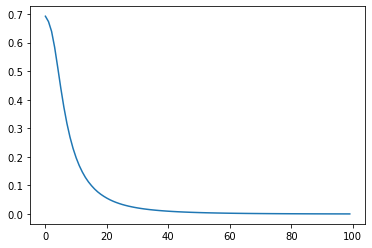

In [116]:
plt.plot(history.history['loss'])

In [131]:
#Évaluer la précision
def predict(word):
    one_hot_word = [tf.keras.preprocessing.text.one_hot(word, 17000)]
    pad_word = tf.keras.preprocessing.sequence.pad_sequences(one_hot_word, maxlen=16,  padding='post')
    
    result = model.predict(pad_word)
    print(result[0][0])
    if result[0][0]>0.1:
        print('you look positive')
    else:
        print('damn you\'re negative')

In [132]:
predict('this tutorial is cool')

0.9998968
you look positive


In [133]:
predict('This tutorial is bad as me')

0.060222745
damn you're negative


In [134]:
example = ["I do enjoy my job",
 "What a poor product!,I will have to get a new one",
 "I feel amazing!","I hate it"]
for i in example: 
    predict(i)

0.7501614
you look positive
0.0012439787
damn you're negative
0.9883835
you look positive
0.0007509291
damn you're negative
